### Project Five

* Vasicek model

$$ dr_t=\alpha(b-r_t)dt+\sigma dW_t$$

* EM scheme

$$ r_{t+1}=r_t+a(b-r_t) \delta +\sigma ({r_t})W_{t,t+\delta}           $$

Todo

1.Implement Euler simulation and draw a plot of $\mathbb E[ r_t ]$ on $t\in [0, 10]$.




In [1]:
import numpy as np
import matplotlib.pyplot as plt

def SDE(Mu,Sigma,r0,T0,T1,n):
    t=np.linspace(T0,T1,n+1)
    rh=r0+np.zeros(n+1)
    for i in range(n):
        rh[i+1]=rh[i]+Mu(rh[i],t[i])*(t[i+1]-t[i])+ \
        Sigma(rh[i],t[i])*np.sqrt(t[i+1]-t[i])*np.random.normal()  
    return rh,t

In [2]:
alpha=2.11
b=0.02
sig=0.2
Mu = lambda r,t: alpha*(b-r)
Sigma=lambda r,t: sig

In [3]:
T0=0
T1=10
n=500  #number of time step
t=np.linspace(T0,T1,n+1)

r0=0.005
r=r0+np.zeros(n+1)
interation=100 # number of iteration time
#K=110.
p=np.zeros(interation)

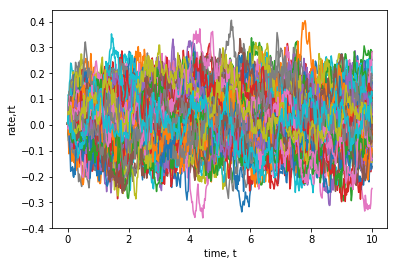

In [4]:
for i in range(interation):
    [rh,t]=SDE(Mu,Sigma,r0,T0,T1,n)
    plt.plot(t,rh)
    plt.xlabel("time, t")
    plt.ylabel("rate,rt")
    p[i]=rh[-1]#p[i]=PutPay(r,T1-T0,K,xh[-1]),sum=sum+xh[-1]


In [5]:
print('The mean short rate is :',p.mean())

('The mean short rate is :', 0.029112811623551241)



2.Find explicit form of $\mathbb E [r_t]$ and $\lim_{t\to \infty} \mathbb E [r_t]$.


Derivation of the explicit form

$$ dr_t=a(b-r_t)dt+\sigma dW_t $$

We know from the Ito's formula,can get:


$$r_t=e^{-at}[r_0+\int_0^tabe^{au}du+\sigma \int_0^te^{au}dW_u] = \mu_t +\sigma \int_0^t e^{a(u-t)}dW_u   $$

The integral of the vasicek model is :

$$ r_t= r_0+\int_0^t a(b-r_u)du+\sigma dW_u             $$

Compares the previous two equations :

$$   \mu_t=\mathbb E[r_t]=r_0+\int_0^ta(b-\mathbb E[r_u])du      $$

Solves  linear ODE, the expection of short rate is :

$$ \mathbb E[r_t]=e^{-at}[r_0+b(e^{at}-1)]      $$

If the stochastic term is included, the explicit solution can be found:

$$ r_t=e^{-at}[r_0+b(e^{at}-1)] + \sigma \int_0^t dW_t    $$

So,
$$ lim_{t \rightarrow \infty} \mathbb E[r_t] = b $$

3.Zero bond price has the formula $$P(0, T) = \mathbb E[\exp\{-\int_0^T r(s) ds\}].$$ Find the exact value of $P(0,1)$.



The exact value of P(0,1) is as follows:

$$ B(0,1)=\frac{1}{a}(1-e^{-a})      $$

$$ A(0,1)=exp[(b-\frac{\sigma^2}{2a^2})(B(0,1)-1)-\frac{\sigma^2}{4a}B^2(0,1)]      $$

$$ P(0,1) =A(0,1) e^{-B(0,1)r_0}   $$

In [6]:
import numpy as np

r0=0.005
a=2.11
b=0.02
sigma=0.033

In [7]:
B=1.0/a*(1-1.0/np.exp(a))
A=np.exp((b-sigma**2/2.0/a**2)*(B-1)-sigma**2/4.0/a*B**2)

P=A*np.exp(-1*B*r0)
B
A
print("The bond price P(0,1)=",P)


('The bond price P(0,1)=', 0.98638958034597035)


4.Run Euler, Milstein, exact simulation on $P(0,1)$ with different stepsizes, and find the covergence rate for each using linear regression. (Hint: one shall approximate integral with finite sum)

* EM scheme

$$ r_{t+1}=r_t+a(b-r_t) \delta +\sigma ({r_t})W_{t,t+\delta}           $$

* Milstein scheme

$$ r_{t+1}= r_t+a(b-r_t) \delta +\sigma ({r_t})W_{t,t+\delta}           $$


* Exact simulation

$$ r_t=e^{-at}[r_0+b(e^{at}-1)] + \sigma \int_0^t dW_t    $$

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [19]:
class SDE:
    
    """
    Initialize
    """
    def __init__(self, Mu, Sigma, InitState):
        self.Mu = Mu
        self.Sigma = Sigma
        self.InitState = InitState
        
        self.MuP = lambda x, t: 0 #first order derivative of Mu
                                #used for Milstein
        
    """
    Euler method
    """
    def Euler(self, T, N):
        x0 = self.InitState
        Mu = self.Mu
        Sigma = self.Sigma       
        t = np.linspace(0, T, N+1)
        DeltaT = T/N
        
        Wh = np.zeros(N+1) #init BM
        Xh = x0 + np.zeros(N+1) #init Xh
        
        for i in range(N): #run EM            
            DeltaW = np.sqrt(t[i+1] - t[i]) * np.random.normal()
            Wh[i+1] = Wh[i] + DeltaW
            Xh[i+1] = Xh[i] + \
                Mu(Xh[i], t[i]) * DeltaT + \
                Sigma(Xh[i], t[i])* DeltaW
            
        return t, Xh, Wh


    """
    Milstein method
    """
    
    def Milstein(self, T, N):
        x0 = self.InitState
        Mu = self.Mu
        MuP = self.MuP
        
        Sigma = self.Sigma
        t = np.linspace(0, T, N+1)
        DeltaT = T/N
        
        Wh = np.zeros(N+1) #init BM
        Xh = x0 + np.zeros(N+1) #init Xh
        
        for i in range(N):
            DeltaW = np.sqrt(t[i+1] - t[i]) * np.random.normal()
            Wh[i+1] = Wh[i] + DeltaW
            Xh[i+1] = Xh[i] + \
                Mu(Xh[i], t[i]) * DeltaT + \
                Sigma(Xh[i], t[i])* DeltaW #Euler
            Xh[i+1] = Xh[i+1] + \
                0.5 * Mu(Xh[i], t[i]) * MuP(Xh[i], t[i]) \
                * (DeltaW**2 - DeltaT)
                
        return t, Xh, Wh
    
    """
    Exact simulation
    """
    def Exact(self,a,b,T,sigma,N):
        
        x0 = self.InitState      
        t = np.linspace(0, T, N+1)
        Xh = x0 + np.zeros(N+1)
        
        for i in range(N):
            Xh[i+1]=x0*np.exp(-1*a*t[i+1])+\
            b-b*np.exp(-1*a*t[i+1])+sigma*np.random.normal()       
        return Xh

    """
    Explict solution
    """
    def Explicit(self,a,b, T, Wt):
        x0 = self.InitState
        xh=x0*np.exp(-1*a*T)+b-b*np.exp(-1*a*T)+Wt
            
        return xh
    
    def Bond_Exact(self,a,b,sigma):
        x0 = self.InitState
        B=1.0/a*(1-1.0/np.exp(a))
        A=np.exp((b-sigma**2/2.0/a**2)*(B-1)-sigma**2/4.0/a*B**2)
        P=A*np.exp(-1*B*x0)
        
        return P

Euler method  covergence rate is 0.0136662061287
Milstein method  covergence rate is 0.0132440859288
Exact simulation  covergence rate is 0.346023212483


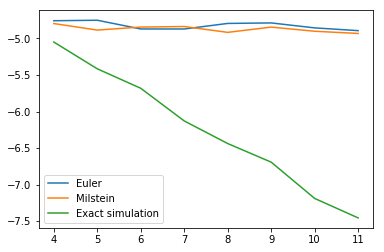

In [20]:
if __name__ == '__main__':
    
    #OU process
    a=2.11
    b=0.02
    mu = lambda x, t: a*(b-x)
    sigma = lambda x, t: 0.033
    sig=0.033
    x0 = 0.005
   
    iSDE = SDE(mu, sigma, x0)

    ArrLog2Steps = np.arange(8)
    NumMinLog2Steps = 4 

    ArrErr_Euler = np.zeros(ArrLog2Steps.size)
    ArrErr_Milstein = np.zeros(ArrLog2Steps.size)
    ArrErr_Exact = np.zeros(ArrLog2Steps.size)
    T = 1.
    NumSimu = 200
    '''
    Exact price of zero-coupon bond
    '''
    P=iSDE.Bond_Exact(a,b,sig)
    
    for n in ArrLog2Steps:
        NumMesh = np.power(2, n + NumMinLog2Steps)
        errsum_Euler = 0
        errsum_Milstein = 0
        errsum_Exact = 0
        
        deltaT=T/NumMesh
        
        for i in range(NumSimu):
            
            '''
            Euler simulation
            '''            
            [t, Xh, Wh] = iSDE.Euler(T, NumMesh)
            XhT = Xh[-1]
            #XT = iSDE.Explicit(a,b,T,Wh[-1])
            PhT=np.exp(-1.0*deltaT*np.sum(Xh))
            errsum_Euler = errsum_Euler + np.abs(PhT - P)
            #plt.plot(t,Xh)
            '''
            Milstein simulation
            '''            
            [t, Xh, Wh] = iSDE.Milstein(T, NumMesh)
            XhT = Xh[-1]
            #XT = iSDE.Explicit(a,b,T,Wh[-1])
            PhT=np.exp(-1.0*deltaT*np.sum(Xh))         
            errsum_Milstein = errsum_Milstein + np.abs(PhT - P)
            '''
            Exact simulation
            '''            
            
            Xh= iSDE.Exact(a,b,T,sig,NumMesh)
            #XhT = Xh[-1]
            #XT= iSDE.Explicit(a,b,T,Wh[-1])
            
            
            PhT=np.exp(-1.0*deltaT*np.sum(Xh))
            errsum_Exact = errsum_Exact + np.abs(PhT - P)

        ArrErr_Euler[n] = errsum_Euler/NumSimu
        ArrErr_Milstein[n] = errsum_Milstein/NumSimu
        ArrErr_Exact[n] = errsum_Exact/NumSimu        

    
    x_coordinate = ArrLog2Steps+NumMinLog2Steps
    y_coordinate_Euler = np.log(ArrErr_Euler)
    y_coordinate_Milstein = np.log(ArrErr_Milstein)
    y_coordinate_Exact = np.log(ArrErr_Exact)    
    plt.plot(x_coordinate, y_coordinate_Euler,label='Euler')
    plt.plot(x_coordinate, y_coordinate_Milstein,label='Milstein')    
    plt.plot(x_coordinate, y_coordinate_Exact,label='Exact simulation')
    plt.legend()   
    
    lg1 = stats.linregress(x_coordinate,y_coordinate_Euler)
    lg2 = stats.linregress(x_coordinate,y_coordinate_Milstein)    
    lg3 = stats.linregress(x_coordinate,y_coordinate_Exact)
    rate1 = -lg1[0]
    rate2=-lg2[0]
    rate3=-lg3[0]
    print('Euler method  covergence rate is '+ str(rate1))
    print('Milstein method  covergence rate is '+ str(rate2))        
    print('Exact simulation  covergence rate is '+ str(rate3))        